# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [185]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']
target = ['SalePrice']

In [163]:
ames.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Continuous Features

In [207]:
# Log transform and normalize
ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names


In [203]:
# normalize (subract mean and divide by std)
# but let's use sklearn plz
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ames_log_norm = scaler.fit_transform(ames_log)

In [210]:
# Making into a df again...
ames_log_norm = pd.DataFrame(ames_log_norm, columns = ames_log.columns)

In [211]:
# One hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)


In [212]:
ames[categoricals].head()

,BldgType,KitchenQual,SaleType,MSZoning,Street,Neighborhood
0,1Fam,Gd,WD,RL,Pave,CollgCr
1,1Fam,TA,WD,RL,Pave,Veenker
2,1Fam,Gd,WD,RL,Pave,CollgCr
3,1Fam,Gd,WD,RL,Pave,Crawfor
4,1Fam,Gd,WD,RL,Pave,NoRidge


In [213]:
ames['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [214]:
ames_ohe.head()

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Combine Categorical and Continuous Features

In [215]:
# combine features into a single dataframe called preprocessed
preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)
preprocessed.head()

,LotArea_log,1stFlrSF_log,GrLivArea_log,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,-0.133231,-0.803570,0.529260,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.113442,0.418585,-0.381846,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.420061,-0.576560,0.659675,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.103347,-0.439287,0.541511,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.878409,0.112267,1.282191,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


## Run a linear model with SalePrice as the target variable in statsmodels

In [216]:
# Your code here
X = preprocessed
y = np.log(ames[target]) # logging target

In [217]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 23 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:38:32   Log-Likelihood:                 601.65
No. Observations:                1460   AIC:                            -1107.
Df Residuals:                    1412   BIC:                            -853.6
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.9714      0.105    113.842      0.000      11.765      12.178
LotArea_log              0.0412      0.008      5.475      0.000       0.026       0.056
1stFlrSF_log             0.0548      0.006      8.584      0.000       0.042       0.067
GrLivArea_log            0.1505      0.006     24.114      0.000       0.138       0.163
BldgType_2fmCon         -0.0685      0.032     -2.173      0.030      -0.130      -0.007
BldgType_Duplex         -0.1679      0.025     -6.813      0.000      -0.216      -0.120
BldgType_Twnhs          -0.0561      0.037     -1.513      0.130      -0.129       0.017
BldgType_TwnhsE         -0.0205      0.024     -0.858      0.391      -0.067       0.026
KitchenQual_Fa          -0.3994      0.035    -11.315      0.000      -0.469      -0.330
KitchenQual_Gd          -0.1526      0.020     -7.613      0.000      -0.192      -0.113
KitchenQual_TA          -0.2673      0.022    -12.111      0.000      -0.311      -0.224
SaleType_CWD             0.0913      0.086      1.061      0.289      -0.077       0.260
SaleType_Con             0.2341      0.121      1.927      0.054      -0.004       0.472
SaleType_ConLD           0.1259      0.062      2.029      0.043       0.004       0.248
SaleType_ConLI           0.0132      0.078      0.169      0.865      -0.140       0.166
SaleType_ConLw           0.0064      0.078      0.082      0.935      -0.147       0.160
SaleType_New             0.1198      0.031      3.803      0.000       0.058       0.182
SaleType_Oth             0.0471      0.098      0.480      0.631      -0.145       0.239
SaleType_WD              0.0698      0.026      2.676      0.008       0.019       0.121
MSZoning_FV              0.4261      0.077      5.526      0.000       0.275       0.577
MSZoning_RH              0.3502      0.078      4.512      0.000       0.198       0.503
MSZoning_RL              0.3979      0.065      6.151      0.000       0.271       0.525
MSZoning_RM              0.4403      0.061      7.264      0.000       0.321       0.559
Street_Pave             -0.0851      0.072     -1.182      0.237      -0.226       0.056
Neighborhood_Blueste     0.0211      0.127      0.167      0.868      -0.228       0.270
Neighborhood_BrDale     -0.1848      0.068     -2.711      0.007      -0.319      -0.051
Neighborhood_BrkSide    -0.2596      0.055     -4.735      0.000      -0.367      -0.152
Neighborhood_ClearCr    -0.0840      0.058     -1.456      0.146      -0.197       0.029
Neighborhood_CollgCr    -0.0304      0.047     -0.641      0.522      -0.123       0.063
Neighborhood_Crawfor    -0.0329      0.052     -0.638      0.523      -0.134       0.068
Neighborhood_Edwards    -0.3041      0.050     -6.143      0.000      -0.401      -0.207
Neighborhood_Gilbert    -0.0391      0.050     -0.777    

## Run the same model in scikit-learn

In [218]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

preds = linreg.predict(X)

In [219]:
# coefficients
linreg.coef_

array([[ 0.04123803,  0.05475763,  0.15047043, -0.06849094, -0.16790514,
        -0.05605952, -0.02045271, -0.39939595, -0.15259939, -0.2673328 ,
         0.09126571,  0.23411019,  0.12586955,  0.0132195 ,  0.00642584,
         0.11977699,  0.04707234,  0.06982549,  0.42606959,  0.35024342,
         0.39789053,  0.4403098 , -0.08512761,  0.02114409, -0.18483139,
        -0.25957286, -0.08396174, -0.0303953 , -0.0328894 , -0.30408946,
        -0.03914605, -0.3842061 , -0.27635109, -0.10198873, -0.17602786,
        -0.00637144, -0.10690515,  0.14505362,  0.14483992, -0.37350736,
        -0.27952174, -0.18991196, -0.09311116,  0.03795979,  0.17159285,
         0.00227384,  0.0509805 ]])

In [220]:
# intercept
linreg.intercept_

array([11.97144414])

In [221]:
from sklearn.metrics import r2_score

r2_score(y, preds)

0.8389500211207063

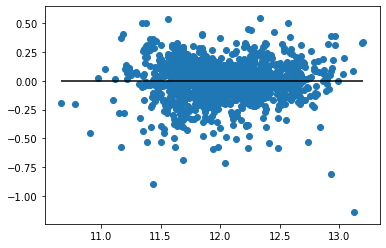

In [222]:
residuals = y - preds

plt.scatter(preds, residuals)
plt.hlines(0, preds.min(), preds.max())

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

In [138]:
# getting the used column names for the df
used_cols = [*continuous, *categoricals]
used_cols

['LotArea',
 '1stFlrSF',
 'GrLivArea',
 'BldgType',
 'KitchenQual',
 'SaleType',
 'MSZoning',
 'Street',
 'Neighborhood']

In [139]:
# creating an empty dataframe for the new row
new_row = pd.DataFrame(columns=used_cols)

In [140]:
# adding the details provided into the empty dataframe
new_row = new_row.append({"LotArea": 14977,
                          '1stFlrSF': 1976,
                          'GrLivArea': 1976,
                          'BldgType': '1Fam',
                          'KitchenQual': 'Gd',
                          'SaleType': 'New',
                          'MSZoning': 'RL',
                          'Street': 'Pave',
                          'Neighborhood': 'NridgHt'},
                          ignore_index=True)

In [141]:
new_row

,LotArea,1stFlrSF,GrLivArea,BldgType,KitchenQual,SaleType,MSZoning,Street,Neighborhood
0,14977,1976,1976,1Fam,Gd,New,RL,Pave,NridgHt


In [43]:
# first we'll tackle the continuous columns
new_row_cont = new_row[continuous]

In [226]:
# log features
log_names = [f'{column}_log' for column in new_row_cont.columns]

new_row_log = np.log(new_row_cont.astype(float)) # won't work unless float
new_row_log.columns = log_names

# normalizing... can just use our scaler

new_row_log = scaler.transform(new_row_log)

In [236]:
new_row_log

array([[0.97324786, 1.83025654, 0.96286942]])

In [235]:
# putting the results in a dataframe
new_row_log_norm = pd.DataFrame(columns=log_names)
new_row_log_norm = new_row_log_norm.append(dict(zip(log_names, new_row_log[0])), ignore_index=True)
new_row_log_norm

,LotArea_log,1stFlrSF_log,GrLivArea_log
0,0.973248,1.830257,0.962869


In [237]:
# now time for the categoricals
new_row_cat = new_row[categoricals]

In [238]:
# using complicated for loops to ohe the new row
ohe_dict = {}
for col_type in new_row_cat.columns:
    col_list = [c for c in new_row_ohe.columns.to_list() if col_type in c]
    for x in col_list:
        if new_row_cat[col_type][0] in x:
            ohe_dict[x] = 1
        else:
            ohe_dict[x] = 0

In [239]:
# putting the results in a dataframe
new_row_ohe = pd.DataFrame(columns = ames_ohe.columns)
new_row_ohe = new_row_ohe.append(ohe_dict, ignore_index=True)
new_row_ohe

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [240]:
# putting together this row's data - both continuous and categorical
new_row_processed = pd.concat([new_row_log_norm, new_row_ohe], axis=1)
new_row_processed

,LotArea_log,1stFlrSF_log,GrLivArea_log,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.973248,1.830257,0.962869,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [241]:
# now - FINALLY - we can model

new_row_pred_log = linreg.predict(new_row_processed)

np.exp(new_row_pred_log)

array([[321728.49636656]])

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!